In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso
import os

In [13]:
boston = pd.read_csv('/content/HousingData (1).csv')

In [14]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [15]:
boston.isna().sum()

,0
CRIM,20
ZN,20
INDUS,20
CHAS,20
NOX,0
RM,0
AGE,20
DIS,0
RAD,0
TAX,0


In [18]:
fill_nan = boston['CRIM'].fillna(value=0,inplace = True)
fill_nan = boston['ZN'].fillna(value=0 ,inplace = True)
fill_nan = boston['INDUS'].fillna(value= boston['INDUS'].mode(),inplace = True)
fill_nan = boston['CHAS'].fillna(value=boston['CHAS'].median(),inplace =True)
fill_nan = boston['AGE'].fillna(value = boston['AGE'].mean(), inplace = True)
fill_nan = boston['LSTAT'].fillna(value= 0,inplace = True)

In [19]:
X= boston.drop('MEDV',axis=1)
y= boston['MEDV']

In [22]:
l= 10
lasso_regression = Lasso(alpha=1)
lasso_regression.fit(X,y)

Lasso(alpha=1)

In [23]:
names = boston.columns.drop('MEDV')
names

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [24]:
coeff = lasso_regression.coef_
intercept = lasso_regression.intercept_

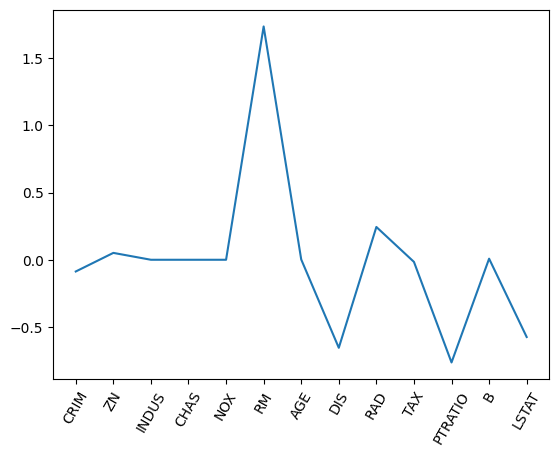

In [31]:
plt.plot(range(len(names)),coeff)
plt.xticks(range(len(names)),names,rotation=60)
plt.ylabel = 'coffeciant'
plt.show()

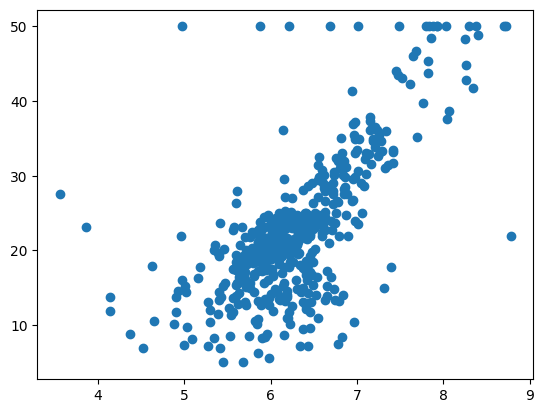

In [34]:
# RM is bigger coffeciant so its so most important coloumn
plt.scatter(boston['RM'],boston['MEDV'])